In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
content = pd.read_csv('Content.csv')
content.head(5)

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [3]:
content.shape

(1000, 4)

In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Content ID    1000 non-null   object
 2   Content Type  1000 non-null   object
 3   Category      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [5]:
reactions = pd.read_csv('Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25


In [6]:
reactions.shape

(24573, 4)

In [7]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
dtypes: int64(1), object(3)
memory usage: 768.0+ KB


In [8]:
reactionTypes = pd.read_csv('reactionTypes.csv')
reactionTypes.head(5)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [9]:
reactionTypes.shape

(16, 4)

# Merging Data sets

In [10]:
#To merge the data sets, we are going to have to rename either one of the colums from reactions or reactionsType to make it easy to merge
# renaming the 'Reaction Type' column to 'Type'
reactions = reactions.rename(columns={'Reaction Type': 'Type'})
reactions.head(5)

,Unnamed: 0,Content ID,Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25


In [11]:

# Merging content_data and reactions_data on Content ID
merged_data = pd.merge(content, reactions, on='Content ID')

# merge merged_data and reaction_types_data on Type
final_data = pd.merge(merged_data, reactionTypes, on='Type')

# display the final merged data set
final_data.head()

,Unnamed: 0_x,Content ID,Content Type,Category,Unnamed: 0_y,Type,Datetime,Unnamed: 0,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1,disgust,07/11/2020 09:43,2,negative,0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4,disgust,06/01/2021 19:13,2,negative,0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,35,disgust,09/04/2021 02:46,2,negative,0
3,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,52,disgust,28/03/2021 21:15,2,negative,0
4,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,88,disgust,04/08/2020 05:40,2,negative,0


In [12]:
# selecting Relevant columns
final_data = final_data.loc[:, ['Content ID', 'Content Type', 'Category','Type','Datetime','Sentiment','Score']]
final_data.head()

,Content ID,Content Type,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,07/11/2020 09:43,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,06/01/2021 19:13,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,09/04/2021 02:46,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,28/03/2021 21:15,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,04/08/2020 05:40,negative,0


In [13]:
final_data.shape

(24573, 7)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    24573 non-null  object
 1   Content Type  24573 non-null  object
 2   Category      24573 non-null  object
 3   Type          24573 non-null  object
 4   Datetime      24573 non-null  object
 5   Sentiment     24573 non-null  object
 6   Score         24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [15]:
final_data.describe()

,Score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


In [16]:
final_data.isnull().sum()

Content ID      0
Content Type    0
Category        0
Type            0
Datetime        0
Sentiment       0
Score           0
dtype: int64

In [17]:
final_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24568    False
24569    False
24570    False
24571    False
24572    False
Length: 24573, dtype: bool

In [18]:
final_data.duplicated().sum()

0

# Exploratory Data Analysis

In [19]:
print(final_data['Content Type'].unique())
print(final_data['Sentiment'].unique())
print(final_data['Category'].unique())
print(final_data['Type'].unique())

['photo' 'video' 'GIF' 'audio']
['negative' 'positive' 'neutral']
['Studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'studying' 'travel' 'veganism'
 'cooking' 'technology' 'animals' 'culture' 'Fitness' 'Veganism' 'Travel'
 'Animals' 'Education' 'Soccer' 'Culture' 'Food' 'Science'
 'Public Speaking' 'Healthy Eating' 'Technology']
['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


In [20]:
#Which content type received the most reactions?
final_data['Content Type'].value_counts()

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content Type, dtype: int64

<Axes: >

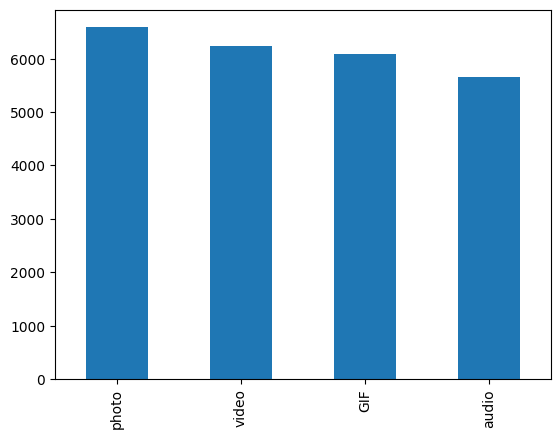

In [21]:
final_data['Content Type'].value_counts().plot(kind = 'bar')

In [22]:
final_data['Category'].value_counts()

animals            1805
healthy eating     1711
technology         1695
science            1680
cooking            1664
culture            1635
travel             1618
food               1608
education          1397
soccer             1392
dogs               1338
tennis             1328
studying           1318
fitness            1257
veganism           1237
public speaking    1185
Fitness             138
Science             116
Animals              92
Food                 91
Soccer               65
Studying             45
Culture              41
Education            36
Public Speaking      32
Travel               29
Veganism             11
Healthy Eating        6
Technology            3
Name: Category, dtype: int64

<Axes: >

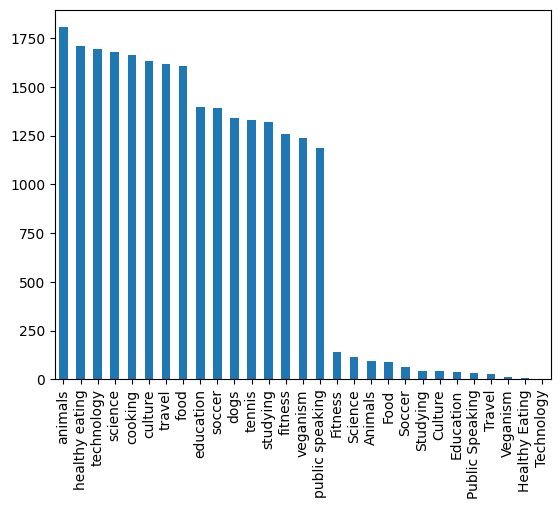

In [23]:
final_data['Category'].value_counts().plot(kind = 'bar')

In [24]:
#Top 5 Categories
category_count = final_data['Category'].value_counts().nlargest(5)
print(category_count)

animals           1805
healthy eating    1711
technology        1695
science           1680
cooking           1664
Name: Category, dtype: int64


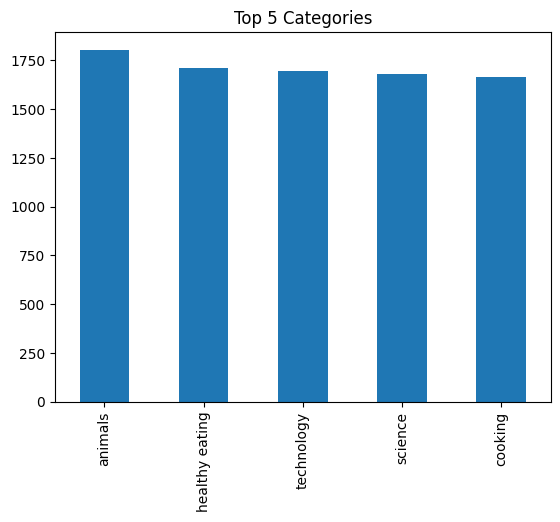

In [25]:
final_data['Category'].value_counts().nlargest(5).plot(kind = 'bar')
plt.title('Top 5 Categories')
plt.show()

In [26]:
final_data['Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

<Axes: >

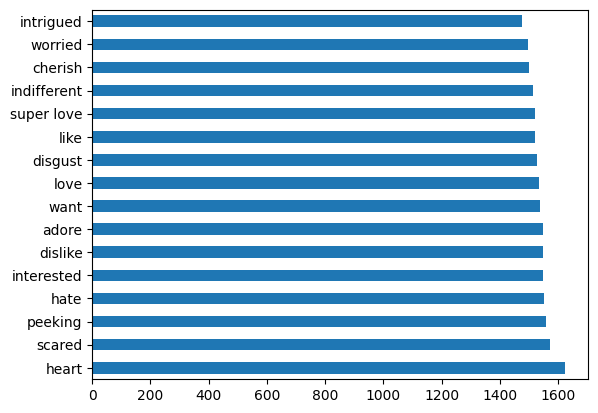

In [27]:
final_data['Type'].value_counts().plot(kind = 'barh')

In [28]:
# Reaction type with the highest number of negative sentiment scores
negative_sentiments = final_data[final_data['Sentiment'] == 'negative']
type_count = negative_sentiments['Type'].value_counts()
print(type_count)

scared     1572
hate       1552
dislike    1548
disgust    1526
worried    1497
Name: Type, dtype: int64


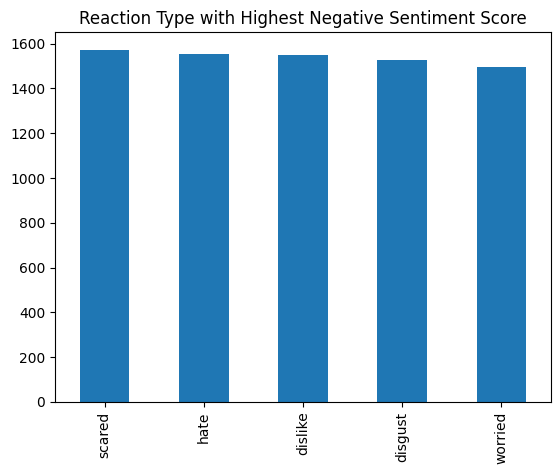

In [29]:
negative_sentiments['Type'].value_counts().plot(kind = 'bar')
plt.title('Reaction Type with Highest Negative Sentiment Score')
plt.show()

In [30]:
# Reaction type with the highest number of Positive sentiment scores
positive_sentiments = final_data[final_data['Sentiment'] == 'positive']
type_count = positive_sentiments['Type'].value_counts()
print(type_count)

heart         1622
interested    1549
adore         1548
want          1539
love          1534
like          1520
super love    1519
cherish       1501
intrigued     1475
Name: Type, dtype: int64


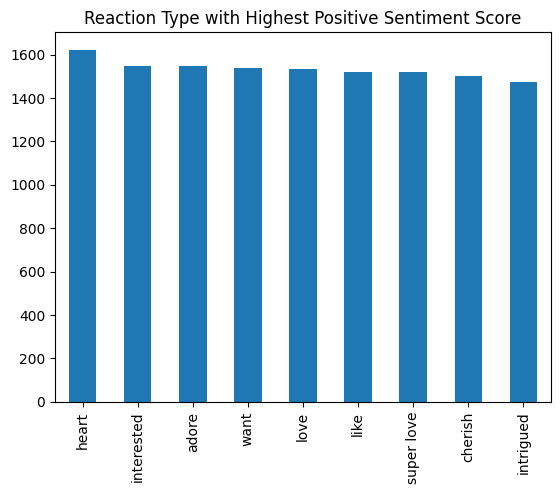

In [31]:
positive_sentiments['Type'].value_counts().plot(kind = 'bar')
plt.title('Reaction Type with Highest Positive Sentiment Score')
plt.show()

In [32]:
final_data['Sentiment'].value_counts()

positive    13807
negative     7695
neutral      3071
Name: Sentiment, dtype: int64

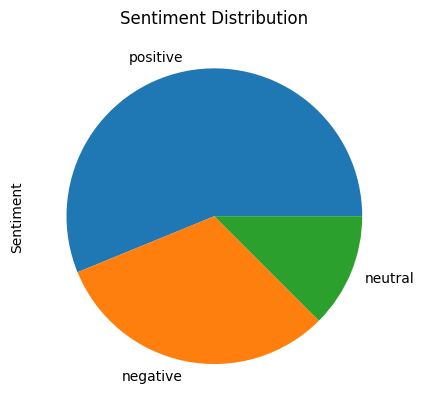

In [33]:
final_data['Sentiment'].value_counts().plot(kind = 'pie')
plt.title('Sentiment Distribution')
plt.show()

In [34]:
final_data.groupby('Sentiment')['Score'].sum()

Sentiment
negative     64784
neutral      84805
positive    824056
Name: Score, dtype: int64

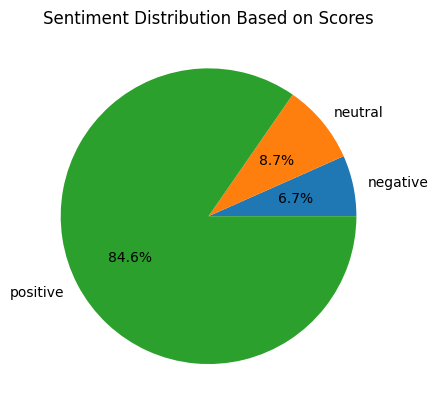

In [35]:
# group the data by sentiment and sum the scores
sentiment_scores = final_data.groupby('Sentiment')['Score'].sum()

# create a pie chart
plt.pie(sentiment_scores, labels=sentiment_scores.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution Based on Scores')
plt.show()

<Axes: xlabel='Category', ylabel='Score'>

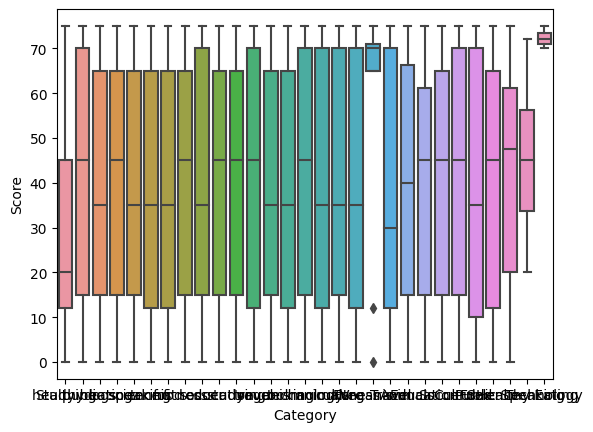

In [36]:
# Distribution of sentiment scores for each content category
sns.boxplot(x="Category", y="Score", data=final_data)

In [37]:
# To determine which content category has the highest number of positive sentiment scores
positive_sentiments = final_data[final_data['Sentiment'] == 'positive']
category_count = positive_sentiments['Category'].value_counts()
print(category_count)

animals            996
healthy eating     980
technology         971
science            950
cooking            932
culture            920
travel             904
food               893
education          793
soccer             780
studying           750
dogs               744
tennis             716
fitness            711
public speaking    693
veganism           680
Fitness             75
Science             65
Animals             54
Food                50
Soccer              37
Culture             23
Education           22
Public Speaking     19
Studying            18
Travel              14
Veganism             9
Healthy Eating       5
Technology           3
Name: Category, dtype: int64


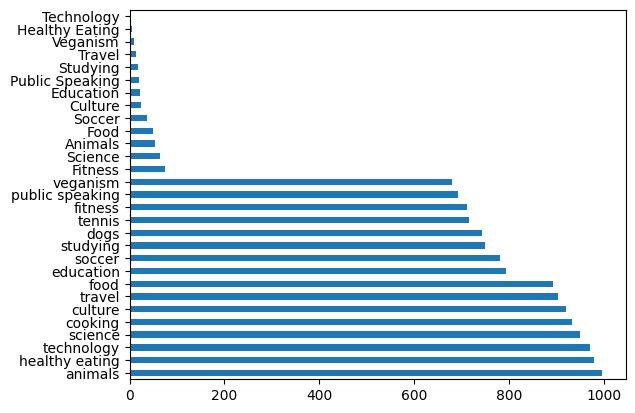

In [38]:
category_count = positive_sentiments['Category'].value_counts().plot(kind = 'barh')
plt.show()

# Trends and Distribution for Year and Month

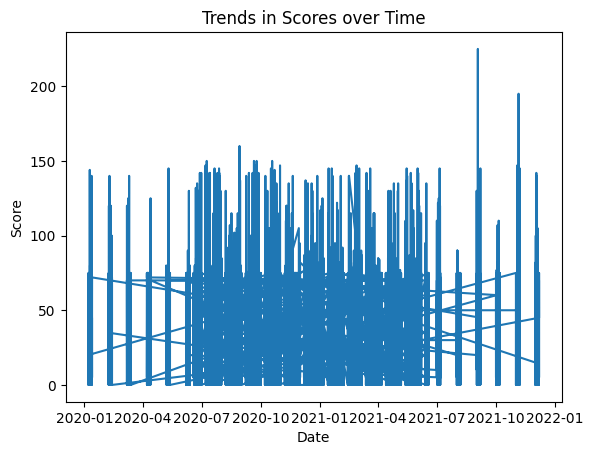

In [39]:
# Group data by datetime and calculate mean score
date_scores = final_data.groupby('Datetime')['Score'].sum()

# Convert index to datetime format
date_scores.index = pd.to_datetime(date_scores.index)

# Create line chart
plt.plot(date_scores.index, date_scores.values)
plt.title('Trends in Scores over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.show()

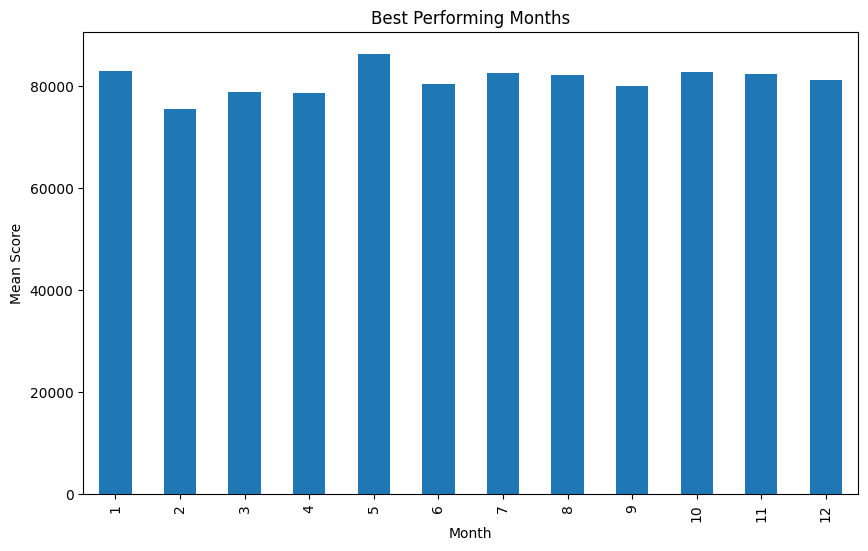

In [40]:
#Monthly Performance based on Scores
# Convert the Datetime column to a pandas datetime object
final_data['Datetime'] = pd.to_datetime(final_data['Datetime'], format='%d/%m/%Y %H:%M')

# Create a new column for the month and year
final_data['Month'] = final_data['Datetime'].dt.month
final_data['Year'] = final_data['Datetime'].dt.year

# Calculate the Total score for each month and year
monthly_scores = final_data.groupby('Month')['Score'].sum()
yearly_scores = final_data.groupby('Year')['Score'].sum()

# Plot the monthly scores
plt.figure(figsize=(10,6))
monthly_scores.plot(kind='bar')
plt.title('Best Performing Months')
plt.xlabel('Month')
plt.ylabel('Mean Score')
plt.show()

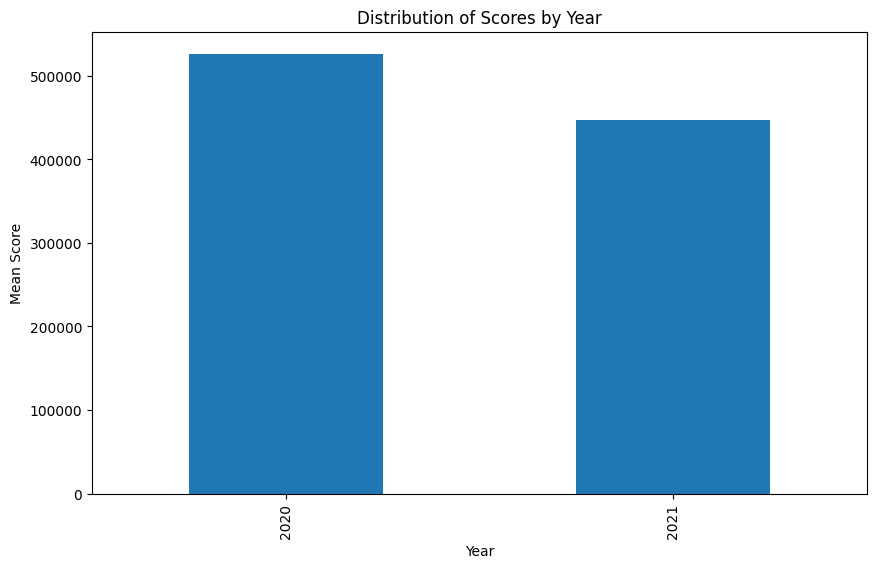

In [41]:
#Yearly Performance based on Scores
# Plot the yearly scores
plt.figure(figsize=(10,6))
yearly_scores.plot(kind='bar')
plt.title('Distribution of Scores by Year')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.show()